In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

# Giving Colab access to the Drive
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/CAIS++/F23_Curriculum/mini_project

Mounted at /content/drive/
/content/drive/My Drive/CAIS++/F23_Curriculum/mini_project


In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder  # Import ImageFolder
from torch.utils.data import DataLoader

# Define the transformations for the images
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize the images
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the images
])

# Define batch size
batch_size = 32

# Load your custom dataset
trainset = ImageFolder(root='./train', transform=transform)
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = ImageFolder(root='./test', transform=transform)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# Assuming you have two classes - muffin and chihuahua
classes = ('muffin', 'chihuahua')


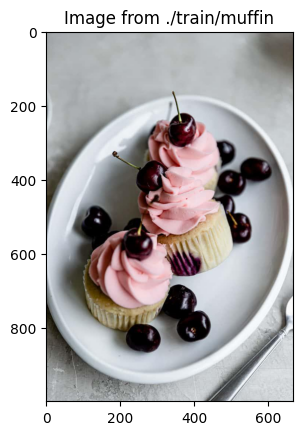

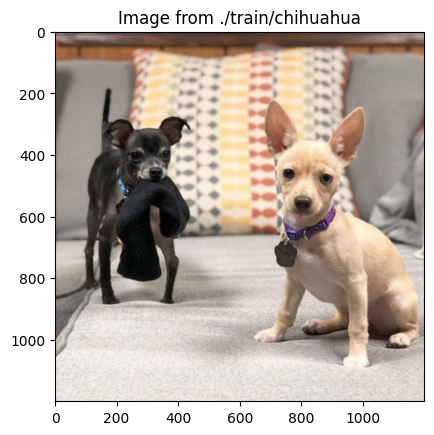

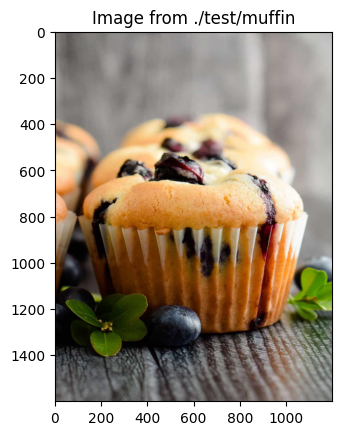

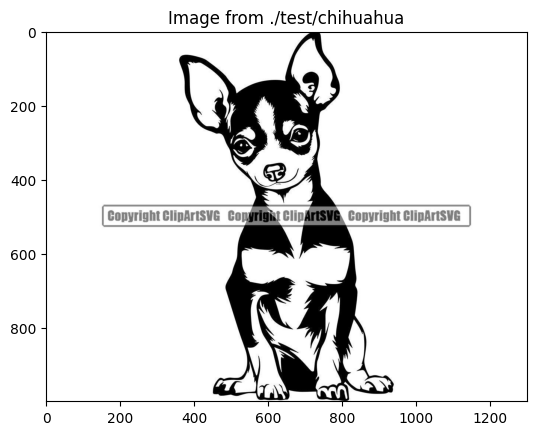

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

def show_random_image_from_folder(folder_path):
    """Show a random image from the given folder."""
    random_filename = random.choice(os.listdir(folder_path))
    img_path = os.path.join(folder_path, random_filename)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f"Image from {folder_path}")
    plt.show()

# Set the path to your train and test folders
train_muffin_path = './train/muffin'
train_chihuahua_path = './train/chihuahua'
test_muffin_path = './test/muffin'
test_chihuahua_path = './test/chihuahua'

# Show random images
show_random_image_from_folder(train_muffin_path)
show_random_image_from_folder(train_chihuahua_path)
show_random_image_from_folder(test_muffin_path)
show_random_image_from_folder(test_chihuahua_path)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

############### YOUR CODE STARTS HERE ####################
# Define the CNN; for an extra challenge, play around with the number & types of layers
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # define your first convolution with a kernel size
        # Hint: how many channels does your input image have? How many pixels?
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)#TODO
        # define batch norm 1
        self.bn1 = nn.BatchNorm2d(32)#TODO
        # define your second convolution
        self.conv2 =  nn.Conv2d(32, 64, 3, padding=1)#TODO
        # define batch norm 2
        self.bn2 = nn.BatchNorm2d(64)#TODO
        # define your third convolution
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)#TODO
        # define batch norm 3
        self.bn3 = nn.BatchNorm2d(128)#TODO
        # define pooling
        self.pool = nn.MaxPool2d(2, 2)#TODO: choose a type of pooling to use
        # define your FC layer(s)... the last FC layer has output of size...?
        self.fc1 = nn.Linear(128 * 4 * 4, 512)#TODO
        self.fc2 = nn.Linear(512, 128)#TODO
        self.fc3 = nn.Linear(128, 10)#TODO

    def forward(self, x):
        # successive convolutions, BN, and pooling
        x = self.pool(F.relu(self.bn1(self.conv1(x))))#TODO
        x = self.pool(F.relu(self.bn2(self.conv2(x))))#TODO
        x = self.pool(F.relu(self.bn3(self.conv3(x))))#TODO
        # flatten all dimensions except batch
        x = x.view(-1, 128 * 4 * 4)#TODO
        # FC layers
        x = F.relu(self.fc1(x))#TODO
        x = F.relu(self.fc2(x))#TODO
        x = self.fc3(x)
        return x

################# YOUR CODE ENDS HERE #################
net = Net()

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 13 * 13, 120)  # Adjust the input features here
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 13 * 13)  # Adjust the input features here
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = SimpleCNN()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 1000 == 999:  # print every 1000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0

print('Finished Training')

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 85 %
